In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from insightface.app import FaceAnalysis

In [2]:
# configure face analysis
faceapp = FaceAnalysis(name='buffalo_sc', root='insightface_model', providers=['CPUExecutionProvider'])
faceapp.prepare(ctx_id=0, det_thresh=0.5, det_size=(640, 640))
#warning: don't set det_thresh < 0.3

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_sc\det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_sc\w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


### Extract Facial Features and Lables

In [3]:
import re # regular expression

In [4]:
def clean_name(string):
    # All only A-Z a-z
    string = re.sub(r'[^A-Za-z]', ' ',string)
    string = string.title()
    return string

In [5]:
listdir = os.listdir(path='images')
for folder_name in listdir:
    role, name = folder_name.split('-')
    name = clean_name(name)
    role = clean_name(role)
    # print('Role =',role,end='\t')
    # print('Name =', name)
# path of each image in respective folder
    img_files = os.listdir(path=f'images/{folder_name}')
    for file in img_files:
        path = f'./images/{folder_name}/{file}'
        # print(path)

In [6]:
person_info = []
listdir = os.listdir(path='images')
print(listdir)
for folder_name in listdir:
    role, name = folder_name.split('-')
    name = clean_name(name)
    role = clean_name(role)
    # print('Role =', role, end='\t')
    # print('Name =', name)
    
    # path of each image in respective folder
    img_files = os.listdir(path= f'images/{folder_name}')
    for file in img_files:
        path = f'./images/{folder_name}/{file}'
        # Step-1: read the image
        img_arr = cv2.imread(path)
        # Step-2: get the info
        result = faceapp.get(img_arr,max_num=1) # return list
        
        if len(result) > 0:
            # Step-3: extract facial embedding
            res = result[0]
            embedding = res['embedding']
            
        # Step-4: save all info name, role, embedding in a list
            person_info.append([name, role, embedding])

['student-Angelina Jolie', 'student-Chris_Evans', 'student-Scarlett Johansson', 'teacher-Barack_Obama', 'teacher-Morgan_Freeman']


In [7]:
print(person_info)

[['Angelina Jolie', 'Student', array([-8.40976000e-01,  1.66230106e+00, -7.45780349e-01, -2.13808250e+00,
       -1.47015786e+00, -3.11864972e-01, -4.34372991e-01, -8.33413005e-03,
       -2.57809377e+00, -7.24452674e-01, -7.44803786e-01, -1.10010147e+00,
        8.61698389e-03,  6.60257339e-01,  8.86285722e-01, -4.80879188e-01,
        8.28123868e-01, -1.36064386e+00, -1.75590670e+00,  1.28723890e-01,
        1.08693480e-01, -3.14491272e-01,  4.69688624e-02, -2.74149776e-01,
        9.88210201e-01, -7.93659627e-01,  7.93380380e-01,  9.79495525e-01,
       -5.42667508e-02,  1.40991104e+00,  1.94809452e-01,  2.03046113e-01,
        2.36951184e+00, -1.76559329e+00,  1.08728409e-02, -7.43437290e-01,
       -1.92973316e-01,  8.24499130e-03, -2.14053893e+00,  6.23251438e-01,
       -1.23908067e+00,  9.09744382e-01,  1.39254034e-01,  9.73632336e-01,
       -4.20270145e-01, -9.36389342e-02, -2.53973055e+00,  8.21645856e-01,
        1.90852731e-01,  6.40686989e-01, -7.30988741e-01,  1.77080154

In [8]:
dataframe = pd.DataFrame(person_info, columns=['Name', 'Role', 'Facial_Features'])
dataframe # store in redis

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[-0.840976, 1.6623011, -0.74578035, -2.1380825..."
1,Angelina Jolie,Student,"[0.09012404, -0.4169108, -0.37650695, 0.424011..."
2,Angelina Jolie,Student,"[0.86389506, 0.32952017, 0.05781859, -1.453824..."
3,Angelina Jolie,Student,"[1.6611172, 1.1610862, -0.41079235, -2.6411536..."
4,Angelina Jolie,Student,"[0.864314, 0.9437618, 0.4265172, -1.1836909, -..."
5,Angelina Jolie,Student,"[0.4104974, 1.1810868, -0.99572563, -1.4019102..."
6,Angelina Jolie,Student,"[0.42300695, 2.0838695, 1.0644906, -2.273823, ..."
7,Angelina Jolie,Student,"[0.39441854, 0.844123, -0.6154812, -2.104783, ..."
8,Angelina Jolie,Student,"[1.0931159, 1.16805, -0.2896319, -2.0099528, -..."
9,Angelina Jolie,Student,"[-0.63542634, 1.7897139, 0.59832734, -3.550089..."


### Step-1: Read Image

In [9]:
# read test image
img_test = cv2.imread('test_images/test_2.jpeg')
cv2.imshow('test image', img_test)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Step-2: Extract Feature

In [10]:
res_test = faceapp.get(img_test,max_num=0)
for i, rt in enumerate (res_test):
    # print('current loop =', i)
    bbox = rt['bbox'].astype(int)
    score = int(rt['det_score']*100)
    embed_test = rt['embedding']
    

In [11]:
# consider only one sample
len(embed_test)

512

In [12]:
dataframe.head()

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[-0.840976, 1.6623011, -0.74578035, -2.1380825..."
1,Angelina Jolie,Student,"[0.09012404, -0.4169108, -0.37650695, 0.424011..."
2,Angelina Jolie,Student,"[0.86389506, 0.32952017, 0.05781859, -1.453824..."
3,Angelina Jolie,Student,"[1.6611172, 1.1610862, -0.41079235, -2.6411536..."
4,Angelina Jolie,Student,"[0.864314, 0.9437618, 0.4265172, -1.1836909, -..."


In [13]:
dataframe

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[-0.840976, 1.6623011, -0.74578035, -2.1380825..."
1,Angelina Jolie,Student,"[0.09012404, -0.4169108, -0.37650695, 0.424011..."
2,Angelina Jolie,Student,"[0.86389506, 0.32952017, 0.05781859, -1.453824..."
3,Angelina Jolie,Student,"[1.6611172, 1.1610862, -0.41079235, -2.6411536..."
4,Angelina Jolie,Student,"[0.864314, 0.9437618, 0.4265172, -1.1836909, -..."
5,Angelina Jolie,Student,"[0.4104974, 1.1810868, -0.99572563, -1.4019102..."
6,Angelina Jolie,Student,"[0.42300695, 2.0838695, 1.0644906, -2.273823, ..."
7,Angelina Jolie,Student,"[0.39441854, 0.844123, -0.6154812, -2.104783, ..."
8,Angelina Jolie,Student,"[1.0931159, 1.16805, -0.2896319, -2.0099528, -..."
9,Angelina Jolie,Student,"[-0.63542634, 1.7897139, 0.59832734, -3.550089..."


In [15]:
X_list = dataframe['Facial_Features'].tolist()
X = np.asarray(X_list)

In [16]:
X.shape

(50, 512)

In [17]:
from sklearn.metrics import pairwise

In [18]:
y = embed_test.reshape(1, 512) # 1 x 512
equlidean_distance = pairwise.euclidean_distances(X,y)
manhattan_distance = pairwise.manhattan_distances(X,y)
cosine_similar = pairwise.cosine_similarity(X,y)

In [27]:
data_search = dataframe.copy()
data_search['equlidean'] = equlidean_distance
data_search['manhattan'] = manhattan_distance
data_search['cosine'] = cosine_similar

In [30]:
data_search.head(3)

,Name,Role,Facial_Features,equlidean,manhattan,cosine
0,Angelina Jolie,Student,"[-0.840976, 1.6623011, -0.74578035, -2.1380825...",30.831608,550.446653,-0.011336
1,Angelina Jolie,Student,"[0.09012404, -0.4169108, -0.37650695, 0.424011...",30.680958,555.258290,0.018317
2,Angelina Jolie,Student,"[0.86389506, 0.32952017, 0.05781859, -1.453824...",31.644897,574.439401,-0.009939


In [31]:
import matplotlib.pyplot as plt

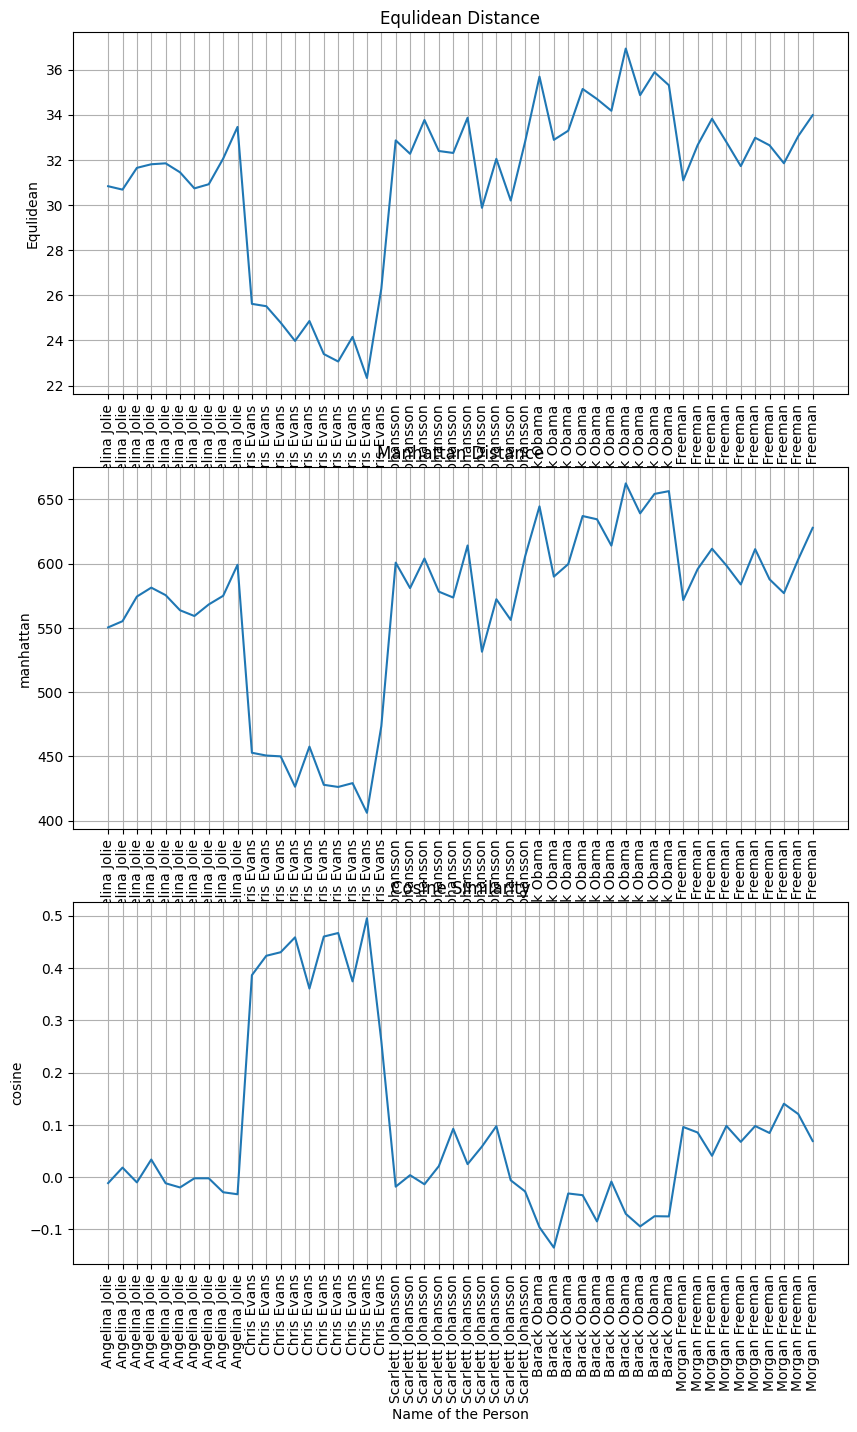

In [32]:
plt.figure(figsize=(10,16))
plt.subplot(3, 1, 1)
plt.plot(data_search['equlidean']) 
plt.xticks(ticks=list(range(len(data_search['equlidean']))), 
           labels=data_search['Name'], rotation=90)
plt.xlabel('Record Number')
plt.ylabel('Equlidean')
plt.title('Equlidean Distance')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(data_search['manhattan']) 
plt.xticks(ticks=list(range(len(data_search['manhattan']))), 
           labels=data_search['Name'], rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('manhattan')
plt.title('Manhattan Distance')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(data_search['cosine']) 
plt.xticks(ticks=list(range(len(data_search['cosine']))), 
           labels=data_search['Name'], rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('cosine')
plt.title('Cosine Similarity')
plt.grid()

plt.show()

### Identify the Person Using Equlidean Distance

In [33]:
d_eq_optimal = 25

In [34]:
datafilter = data_search.query(f'equlidean < {d_eq_optimal}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmin = datafilter['equlidean'].argmin()
    name, role = datafilter.loc[argmin][['Name','Role']]

else:
    name = 'Unknown'
    role = 'Unknown'

In [35]:
print(name, role)

Chris Evans Student


### Identify the Person Using Manhattan Distance

In [36]:
d_man_optimal = 450

In [37]:
datafilter = data_search.query(f'manhattan < {d_man_optimal}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmin = datafilter['manhattan'].argmin()
    name_man, role_man = datafilter.loc[argmin][['Name','Role']]

else:
    name_man = 'Unknown'
    role_man = 'Unknown'

In [38]:
print(name_man, role_man)

Chris Evans Student


### Identify the Person Using Cosine Similarity

In [39]:
S_opt = 0.4

In [40]:
datafilter = data_search.query(f'cosine > {S_opt}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmax = datafilter['cosine'].argmax()
    name_cos, role_cos = datafilter.loc[argmax][['Name','Role']]

else:
    name_cos = 'Unknown'
    role_cos = 'Unknown'

In [41]:
print(name_cos, role_cos)

Chris Evans Student


In [42]:
datafilter

,Name,Role,Facial_Features,equlidean,manhattan,cosine
0,Chris Evans,Student,"[1.7491676, -2.121821, -0.15238187, -0.9057255...",25.515486,450.687723,0.423367
1,Chris Evans,Student,"[0.44954258, -1.6314547, -0.95116156, -1.54259...",24.786526,450.057995,0.430162
2,Chris Evans,Student,"[0.8585504, -1.0998966, -0.7710619, -1.4918095...",23.976940,426.412995,0.458632
3,Chris Evans,Student,"[0.35355112, -0.69770634, -0.30065766, -1.9116...",23.396654,427.903387,0.460120
4,Chris Evans,Student,"[1.311513, -2.0906692, -1.0403854, -1.7981217,...",23.065950,426.244138,0.466912
5,Chris Evans,Student,"[0.5908869, -1.415056, -0.6726382, -1.310897, ...",22.336002,406.118972,0.495197


### Identify Multiple Person in an Image

In [43]:
def ml_search_algorithm(dataframe,feature_column,test_vector,name_role=['Name','Role'],thresh=0.5):
    """
    cosine similarity base search algorithm
    """
# Step-1: Take the dataframe (collection of data)
    dataframe = dataframe.copy()
    
# Step-2: Index face embedding from the dataframe and convert into array
    X_list = dataframe[feature_column].tolist()
    x = np.asarray(X_list)
    
# Step-3: Cal. cosine similarity
    similar = pairwise.cosine_similarity(x, test_vector.reshape(1,-1))
    similar_arr = np.array(similar).flatten()
    dataframe['cosine'] = similar_arr
    
# Step-4: Filter the data
    data_filter = dataframe.query(f'cosine >={thresh}')
    if len(data_filter) > 0:
        # Step-5: Get the person name
        data_filter.reset_index(drop=True, inplace=True)
        argmax = data_filter['cosine'].argmax()
        person_name, person_role = data_filter.loc[argmax][name_role]

    else:
        person_name = 'Unknown'
        person_role = 'Unknown'

    return person_name, person_role

In [46]:
test_image = cv2.imread('test_images/test_11.jpg')
# test_image = cv2.resize(test_img, (640, 380))
# cv2.imshow('test_image', test_image)
cv2.imshow('test_image', test_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
# Step-1: Take the test iamge and apply to insight face
results = faceapp.get(test_image)
test_copy = test_image.copy()
# Step-2: Use for loop and extract each embedding and pass to ml_search_algorithm

for res in results:
    x1, y1, x2, y2 = res['bbox'].astype(int)
    embeddings = res['embedding']
    person_name, person_role = ml_search_algorithm(dataframe_compress,'Facial_Features',test_vector=embeddings,name_role=['Name','Role'],thresh=0.5)


    if person_name == 'Unknown':
        color = (0,0,255) # bgr
    else:
        color = (0,255,0) # bgr
    
    cv2.rectangle(test_copy, (x1, y1), (x2, y2), color)

    text_gen = person_name
    cv2.putText(test_copy, text_gen, (x1, y1), cv2.FONT_HERSHEY_DUPLEX, 0.8, color, 2)
    
cv2.imshow('test_image', test_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Compressing my dataset

In [47]:
dataframe_compress = dataframe.groupby(by=['Name','Role']).mean()
dataframe_compress.reset_index(inplace=True)
dataframe_compress

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[0.43240866661071775, 1.0746602058410644, -0.1..."
1,Barack Obama,Teacher,"[0.9487081527709961, -0.5583571434020996, 0.09..."
2,Chris Evans,Student,"[0.7200981616973877, -1.4685219764709472, -0.7..."
3,Morgan Freeman,Teacher,"[0.4854259490966797, -0.6193630218505859, -0.4..."
4,Scarlett Johansson,Student,"[0.19131546020507811, -0.48847036361694335, -1..."


## Convert dataframe into array and save in numpy zip format

In [52]:
xvalues = dataframe_compress.values

In [53]:
col_name = np.array(dataframe_compress.columns)
col_name

array(['Name', 'Role', 'Facial_Features'], dtype=object)

In [54]:
np.savez('dataframe_students_teacher.npz', xvalues, col_name)

In [55]:
file_np = np.load('dataframe_students_teacher.npz', allow_pickle=True)
file_np

NpzFile 'dataframe_students_teacher.npz' with keys: arr_0, arr_1

In [56]:
pd.DataFrame(file_np['arr_0'], columns=file_np['arr_1'])

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[0.43240866661071775, 1.0746602058410644, -0.1..."
1,Barack Obama,Teacher,"[0.9487081527709961, -0.5583571434020996, 0.09..."
2,Chris Evans,Student,"[0.7200981616973877, -1.4685219764709472, -0.7..."
3,Morgan Freeman,Teacher,"[0.4854259490966797, -0.6193630218505859, -0.4..."
4,Scarlett Johansson,Student,"[0.19131546020507811, -0.48847036361694335, -1..."
